'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


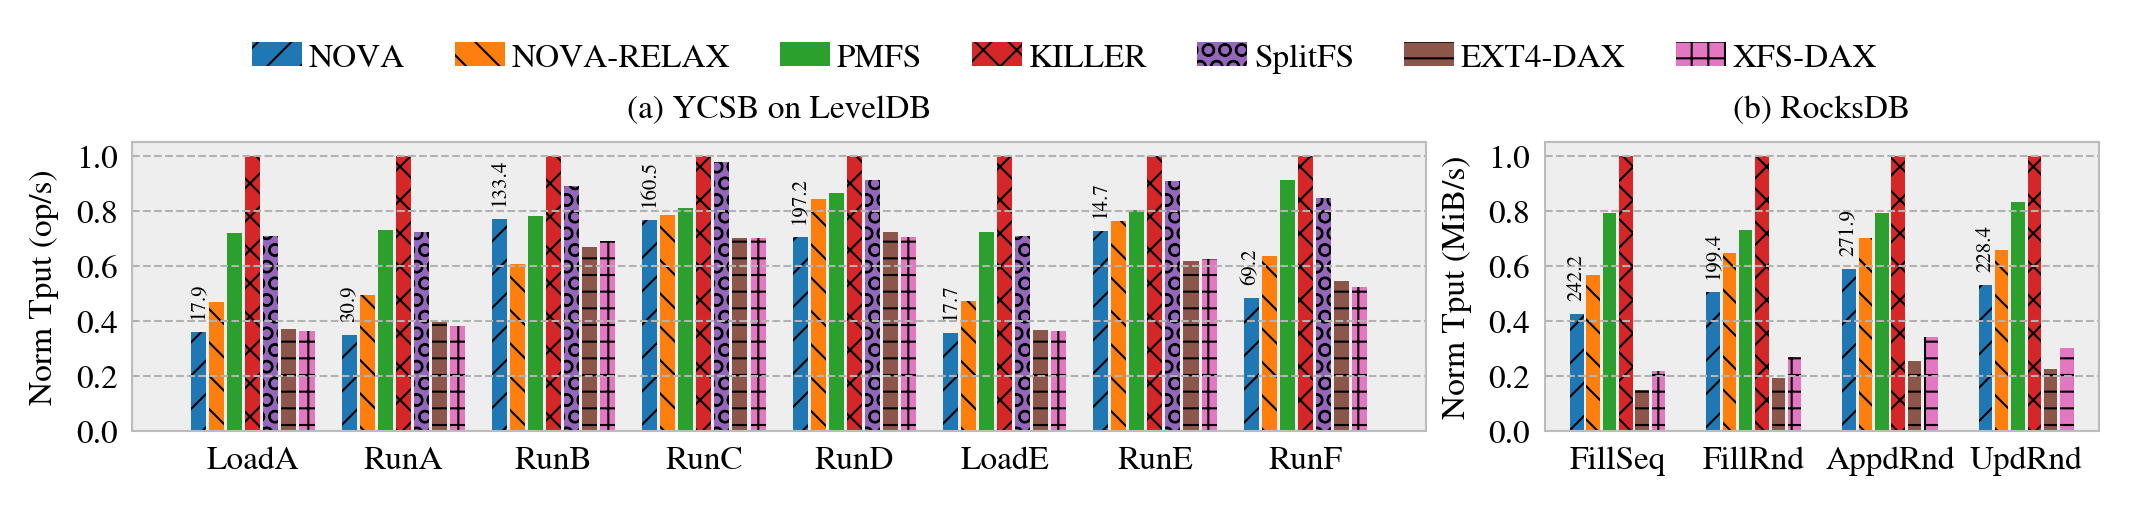

In [1]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec


# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams['grid.linestyle'] = "--"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
    orig_df = df.copy()
with open("./performance-comparison-table-rocksdb", "r") as f:
    df_rdb = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
    orig_df_rdb = df_rdb.copy()

df_rdb.drop(df_rdb[df_rdb['file_system'] == "SplitFS-FIO"].index, inplace=True)

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(DOUBLE_COL_WIDTH), cm_to_inch(3.5)))
gs = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[7, 3])

bar_width = 0.12
true_bar_width = 0.1
patterns = ['///', '\\\\\\', '', 'XXX', 'OOO', '---', '+++']
# Reference: https://designbro.com/blog/inspiration/color-combinations/
colors = ["#2b2d42", "#8d99ae", "#edf2f4", "#ef233c", "#ef233c", "#ef233c", "#ef233c", "#ef233c",]

fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
workloads = [ "loada(micros/op)", "runa(micros/op)", "runb(micros/op)", "runc(micros/op)", "rund(micros/op)", "loade(micros/op)", "rune(micros/op)", "runf(micros/op)" ]
# workloads_name_remap = ["Fileserver", "Varmail", "Webserver", "Webproxy", "Fileserver-8", "Varmail-8", "Webserver-8", "Webproxy-8"]
workloads_name_remap = ["LoadA", "RunA", "RunB", "RunC", "RunD", "LoadE", "RunE", "RunF"]
tot = len(fss) * bar_width
cmap = "tab10"
x = list(range(1, len(workloads) + 1))
# num_threads = [1]
# for thread in num_threads:
for workload in workloads:
    value = df[workload] / df[workload].min()
    df[workload] = value

# for fig_idx in range(0, len(num_threads)):
# subfig = plt.subplot(1, 1, 1)
subfig = plt.subplot(gs[0, 0])

bars = []
for idx, fs in enumerate(fss):
    points = []
    for pivot in x:
        point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
        points.append(point)
    bws = []
    for workload in workloads:
        bws.append(1 / df[(df['file_system'] == fs)][workload].iloc[0])
    
    bar = plt.bar(points, bws, width=true_bar_width, hatch=patterns[idx], color=plt.get_cmap(cmap)(idx), linewidth=0.5)
    bars.append(bar)
    
    # text on each bar
    if idx == 0:
        for i in range(len(bws)):
            plt.text(points[i], bws[i] + 0.05, "%.1f" % (1000 / orig_df[(orig_df['file_system'] == fs)][workloads[i]].iloc[0]), ha='center', va='bottom', rotation=90, fontsize=5)

    
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    
    # Draw title
    plt.xticks(x, labels=workloads_name_remap, fontsize=8)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
    # plt.yticks(np.linspace(0, 3, 6), fontsize=8)
    # if fig_idx == 0:
    plt.ylabel('Norm Tput (op/s)', fontsize=8)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    # plt.xlabel(subfig_titles[fig_idx], fontsize=8)
plt.title("(a) YCSB on LevelDB", fontsize=8)

legend_labels = fss
fss.replace("SplitFS-YCSB", "SplitFS", inplace=True)
# fig.legend(legend_labels, loc='center', bbox_to_anchor=(0.5, 1), ncol=7, fontsize=8, frameon=False, columnspacing=1.5, handletextpad=0.2, handlelength=1.5)

df = df_rdb
fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
workloads = [ "fill_seq(MB/s)", "fillrandom(MB/s)", "appendrandom(MB/s)", "updaterandom(MB/s)" ]
# workloads_name_remap = ["Fileserver", "Varmail", "Webserver", "Webproxy", "Fileserver-8", "Varmail-8", "Webserver-8", "Webproxy-8"]
workloads_name_remap = ["FillSeq", "FillRnd", "AppdRnd", "UpdRnd" ]
tot = len(fss) * bar_width
cmap = "tab10"
x = list(range(1, len(workloads) + 1))
# num_threads = [1]
# for thread in num_threads:
for workload in workloads:
    value = df[workload] / df[workload].max()
    df[workload] = value

# for fig_idx in range(0, len(num_threads)):
# subfig = plt.subplot(1, 1, 1)
subfig = plt.subplot(gs[0, 1])
for idx, fs in enumerate(fss):
    points = []
    for pivot in x:
        point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
        points.append(point)
    bws = []
    for workload in workloads:
        bws.append(df[(df['file_system'] == fs)][workload].iloc[0])
    
    if idx >= 4:
        fs_idx = idx + 1
    else:
        fs_idx = idx

    plt.bar(points, bws, width=true_bar_width, hatch=patterns[fs_idx], color=plt.get_cmap(cmap)(fs_idx), linewidth=0.5)
    if idx == 0:
        for i in range(len(bws)):
            plt.text(points[i], bws[i] + 0.05, "%.1f" % (orig_df_rdb[(orig_df_rdb['file_system'] == fs)][workloads[i]].iloc[0]), ha='center', va='bottom', rotation=90, fontsize=5)

    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    
    # Draw title
    plt.xticks(x, labels=workloads_name_remap, fontsize=8)
    # plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
    # plt.yticks(np.linspace(0, 2.5, 6), fontsize=8)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
    # if fig_idx == 0:
    plt.ylabel('Norm Tput (MiB/s)', fontsize=8)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    # plt.xlabel(subfig_titles[fig_idx], fontsize=8)
plt.title("(b) RocksDB", fontsize=8)

# steps = [4, 3]
# for ax_id, ax in enumerate(fig.axes):
#     start = sum(steps[:ax_id])
#     end = start + steps[ax_id]

#     leg = ax.legend(bars[start : end], legend_labels[start : end], loc='upper right', bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=1, fontsize=5, frameon=True, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)
    
#     frame = leg.get_frame()
#     frame.set_facecolor('white')
#     frame.set_edgecolor('black')
fig.legend(legend_labels, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=7, fontsize=8, frameon=False, columnspacing=1.5, handletextpad=0.2, handlelength=1.5)


plt.tight_layout(pad=0.4)
plt.savefig("./FIG-RealWorld.pdf", bbox_inches='tight', pad_inches=0)

# DEPRECATE

NOVA
1.0$\times$
1.0$\times$
1.0$\times$
1.0$\times$
1.0$\times$
1.0$\times$
1.0$\times$
1.0$\times$
NOVA-RELAX
1.31$\times$
1.42$\times$
0.79$\times$
1.02$\times$
1.19$\times$
1.32$\times$
1.05$\times$
1.32$\times$
PMFS
2.01$\times$
2.1$\times$
1.02$\times$
1.06$\times$
1.22$\times$
2.03$\times$
1.1$\times$
1.89$\times$
KILLER
2.79$\times$
2.86$\times$
1.3$\times$
1.3$\times$
1.41$\times$
2.8$\times$
1.37$\times$
2.07$\times$
SplitFS-YCSB
1.97$\times$
2.07$\times$
1.16$\times$
1.27$\times$
1.29$\times$
1.98$\times$
1.25$\times$
1.75$\times$
EXT4-DAX
1.03$\times$
1.13$\times$
0.87$\times$
0.91$\times$
1.02$\times$
1.03$\times$
0.85$\times$
1.13$\times$
XFS-DAX
1.01$\times$
1.09$\times$
0.9$\times$
0.92$\times$
1.0$\times$
1.01$\times$
0.86$\times$
1.08$\times$


'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


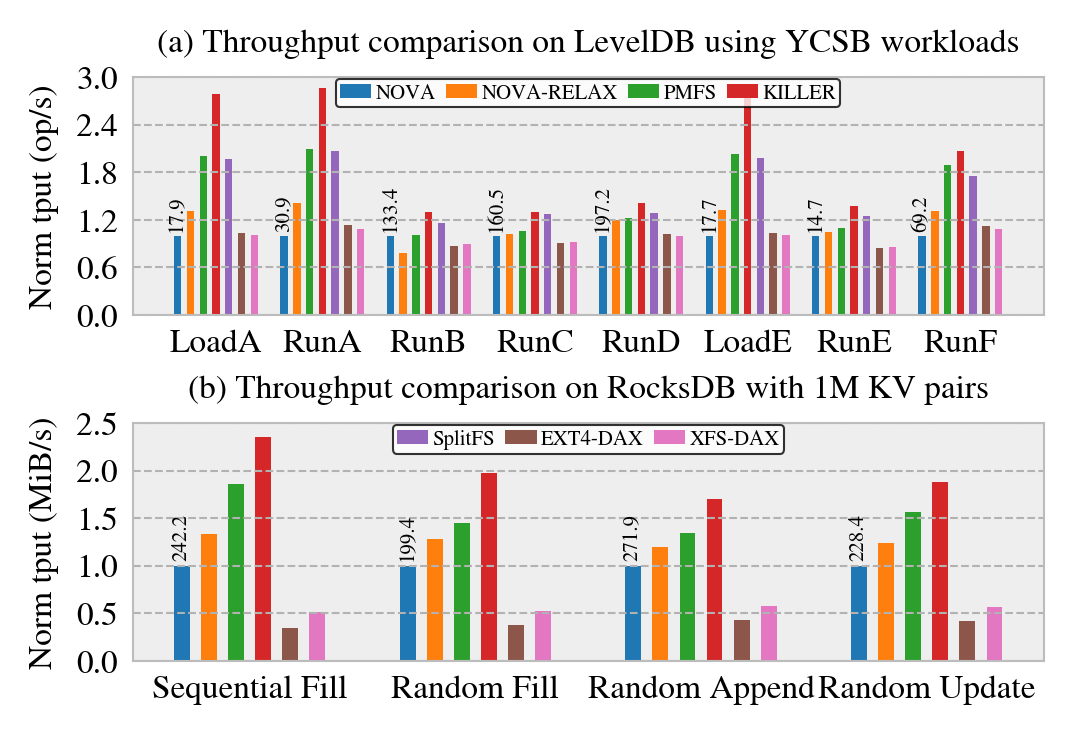

In [1]:
# # ipython -c "%run plot.ipynb"

# import matplotlib
# import matplotlib.pyplot as plt
# from matplotlib import style
# import pandas as pd
# import numpy as np
# import matplotlib.gridspec as gridspec


# # Paper specific settings
# STANDARD_WIDTH = 17.8
# SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
# DOUBLE_COL_WIDTH = STANDARD_WIDTH
# def cm_to_inch(value):
#     return value/2.54
    
# # matplotlib style settings
# matplotlib.rcParams['text.usetex'] = False
# style.use('bmh')
# plt.rcParams["axes.grid"] = True
# plt.rcParams["axes.grid.axis"] = "y"
# plt.rcParams["grid.linewidth"] = 0.5
# plt.rcParams['hatch.linewidth'] = 0.5
# plt.rcParams["font.family"] = "Nimbus Roman"
# plt.rcParams['grid.linestyle'] = "--"
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None


# # Data Preprocessing
# # with open("./avg-test-result-in-paper", "r") as f:
# with open("./performance-comparison-table", "r") as f:
#     df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
#     orig_df = df.copy()
# with open("./performance-comparison-table-rocksdb", "r") as f:
#     df_rdb = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
#     orig_df_rdb = df_rdb.copy()

# df_rdb.drop(df_rdb[df_rdb['file_system'] == "SplitFS-FIO"].index, inplace=True)

# # Plotting Settings
# fig = plt.figure(dpi = 300, figsize = (cm_to_inch(DOUBLE_COL_WIDTH), cm_to_inch(3)))
# gs = gridspec.GridSpec(2, 1, figure=fig)

# bar_width = 0.12
# true_bar_width = 0.07
# # patterns = ['///', '\\\\\\', '', 'XXX', 'OOO', '---', '+++']
# patterns = ['', '', '', '', '', '', '', '']
# # Reference: https://designbro.com/blog/inspiration/color-combinations/
# colors = ["#2b2d42", "#8d99ae", "#edf2f4", "#ef233c", "#ef233c", "#ef233c", "#ef233c", "#ef233c",]

# fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
# workloads = [ "loada(micros/op)", "runa(micros/op)", "runb(micros/op)", "runc(micros/op)", "rund(micros/op)", "loade(micros/op)", "rune(micros/op)", "runf(micros/op)" ]
# # workloads_name_remap = ["Fileserver", "Varmail", "Webserver", "Webproxy", "Fileserver-8", "Varmail-8", "Webserver-8", "Webproxy-8"]
# workloads_name_remap = ["LoadA", "RunA", "RunB", "RunC", "RunD", "LoadE", "RunE", "RunF"]
# tot = len(fss) * bar_width
# cmap = "tab10"
# x = list(range(1, len(workloads) + 1))
# # num_threads = [1]
# # for thread in num_threads:
# for workload in workloads:
#     value = df[workload] / df[workload][0]
#     df[workload] = value

# # for fig_idx in range(0, len(num_threads)):
# # subfig = plt.subplot(1, 1, 1)
# subfig = plt.subplot(gs[0, 0])

# bars = []
# for idx, fs in enumerate(fss):
#     points = []
#     for pivot in x:
#         point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
#         points.append(point)
#     bws = []
#     for workload in workloads:
#         bws.append(1 / df[(df['file_system'] == fs)][workload].iloc[0])
    
#     bar = plt.bar(points, bws, width=true_bar_width, hatch=patterns[idx], color=plt.get_cmap(cmap)(idx), linewidth=0.5)
#     bars.append(bar)

#     print(fs)
#     for bw in bws:
#         print(str(round(bw, 2)) + r"$\times$")
    
#     # text on each bar
#     if idx == 0:
#         for i in range(len(bws)):
#             plt.text(points[i], bws[i] + 0.05, "%.1f" % (1000 / orig_df[(orig_df['file_system'] == fs)][workloads[i]].iloc[0]), ha='center', va='bottom', rotation=90, fontsize=5)

    
#     ax = fig.gca()
#     lw = 0.5
#     for axis in ['top','bottom','left','right']:
#         ax.spines[axis].set_linewidth(lw)
    
#     # Draw title
#     plt.xticks(x, labels=workloads_name_remap, fontsize=8)
#     # plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
#     plt.yticks(np.linspace(0, 3, 6), fontsize=8)
#     # if fig_idx == 0:
#     plt.ylabel('Norm tput (op/s)', fontsize=8)
#     plt.tick_params(bottom=False, top=False, left=False, right=False)
#     # plt.xlabel(subfig_titles[fig_idx], fontsize=8)
# plt.title("(a) Throughput comparison on LevelDB using YCSB workloads", fontsize=8)

# legend_labels = fss
# fss.replace("SplitFS-YCSB", "SplitFS", inplace=True)
# # fig.legend(legend_labels, loc='center', bbox_to_anchor=(0.5, 1), ncol=7, fontsize=8, frameon=False, columnspacing=1.5, handletextpad=0.2, handlelength=1.5)

# df = df_rdb
# fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
# workloads = [ "fill_seq(MB/s)", "fillrandom(MB/s)", "appendrandom(MB/s)", "updaterandom(MB/s)" ]
# # workloads_name_remap = ["Fileserver", "Varmail", "Webserver", "Webproxy", "Fileserver-8", "Varmail-8", "Webserver-8", "Webproxy-8"]
# workloads_name_remap = ["Sequential Fill", "Random Fill", "Random Append", "Random Update" ]
# tot = len(fss) * bar_width
# cmap = "tab10"
# x = list(range(1, len(workloads) + 1))
# # num_threads = [1]
# # for thread in num_threads:
# for workload in workloads:
#     value = df[workload] / df[workload][0]
#     df[workload] = value

# # for fig_idx in range(0, len(num_threads)):
# # subfig = plt.subplot(1, 1, 1)
# subfig = plt.subplot(gs[1, 0])
# for idx, fs in enumerate(fss):
#     points = []
#     for pivot in x:
#         point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
#         points.append(point)
#     bws = []
#     for workload in workloads:
#         bws.append(df[(df['file_system'] == fs)][workload].iloc[0])
    
#     if idx >= 4:
#         fs_idx = idx + 1
#     else:
#         fs_idx = idx

#     plt.bar(points, bws, width=true_bar_width, hatch=patterns[fs_idx], color=plt.get_cmap(cmap)(fs_idx), linewidth=0.5)
#     if idx == 0:
#         for i in range(len(bws)):
#             plt.text(points[i], bws[i] + 0.05, "%.1f" % (orig_df_rdb[(orig_df_rdb['file_system'] == fs)][workloads[i]].iloc[0]), ha='center', va='bottom', rotation=90, fontsize=5)

#     ax = fig.gca()
#     lw = 0.5
#     for axis in ['top','bottom','left','right']:
#         ax.spines[axis].set_linewidth(lw)
    
#     # Draw title
#     plt.xticks(x, labels=workloads_name_remap, fontsize=8)
#     # plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
#     plt.yticks(np.linspace(0, 2.5, 6), fontsize=8)
#     # if fig_idx == 0:
#     plt.ylabel('Norm tput (MiB/s)', fontsize=8)
#     plt.tick_params(bottom=False, top=False, left=False, right=False)
#     # plt.xlabel(subfig_titles[fig_idx], fontsize=8)
# plt.title("(b) Throughput comparison on RocksDB with 1M KV pairs", fontsize=8)

# steps = [4, 3]
# for ax_id, ax in enumerate(fig.axes):
#     start = sum(steps[:ax_id])
#     end = start + steps[ax_id]

#     leg = ax.legend(bars[start : end], legend_labels[start : end], loc='upper center', bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=steps[ax_id], fontsize=5, frameon=True, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)
    
#     frame = leg.get_frame()
#     frame.set_facecolor('white')
#     frame.set_edgecolor('black')


# plt.tight_layout(pad=0.4)
# plt.savefig("./FIG-RealWorld.pdf", bbox_inches='tight', pad_inches=0)
